# OpenSAFELY COVID Vaccine coverage report

OpenSAFELY is a new secure analytics platform for electronic patient records built on behalf of NHS England to deliver urgent academic and operational research during the pandemic. 

This is our regular weekly report on COVID-19 vaccination coverage in England using data from 40% of general practices that use TPP electronic health record software. **The data requires careful interpretation and there are a number of caveats. Please read the full detail about our methods and discussion of our earlier results (as of January 13th) in our preprint paper available [here](https://www.medrxiv.org/content/10.1101/2021.01.25.21250356v2).** 

The full analytical methods behind the latest results in this report are available [here](https://github.com/opensafely/nhs-covid-vaccination-uptake).

In [1]:
from datetime import datetime
from IPython.display import display, Markdown
import os
import pandas as pd
pd.set_option("display.max_rows", 200)

suffix = "_tpp"

display(Markdown(f"### Report last updated **{datetime.today().strftime('%d %b %Y')}**"))

with open(os.path.join("..", "interim-outputs","text", "latest_date.txt"), 'r') as file:
    latest_date_fmt = file.read()
    display(Markdown(f"### Vaccinations included up to **{latest_date_fmt}** inclusive"))

with open(os.path.join("..", "interim-outputs","text", "latest_date_of_first_dose_for_due_second_doses.txt"), 'r') as file:
    latest_date_13w_fmt = file.read()


### Report last updated **21 Jun 2021**

### Vaccinations included up to **25 May 2021** inclusive

#### 
## Contents:
- **<a href=#summary>Overview</a>**
- **<a href=#summarychart>Summary Chart</a>**
- **Trends in vaccination coverage** according to demographic/clinical features, for:
 - <a href=#charts80>80+ population</a>
 - <a href=#charts70>70-79 population</a>
 - <a href=#charts_shield>shielding (aged 16-69) population</a>
 - <a href=#charts65>65-69 population</a>
 - <a href=#charts60>60-64 population</a>
 - <a href=#charts55>55-59 population</a>
 - <a href=#charts50>50-54 population</a>
- **<a href=#tables>Current vaccination coverage of each eligible population group, according to demographic/clinical features</a>**
  - Includes each of the groups above, plus care home (65+) and LD (aged 16-64) populations.

- Appendix: <a href=#ethnicity>Proportion of each population group for whom ethnicity is known</a>

# 
## Overview of Vaccination Figures to date <a name='summary' />

In [3]:
import json
summary_stats_1 = pd.read_csv(os.path.join("..", "interim-outputs","text", "summary_stats_first_dose.txt")).set_index("Unnamed: 0")
summary_stats_2 = pd.read_csv(os.path.join("..", "interim-outputs","text", "summary_stats_second_dose.txt")).set_index("Unnamed: 0")
additional_stats = pd.read_csv(os.path.join("..", "interim-outputs","text", "additional_stats_first_dose.txt")).set_index("Unnamed: 0")

out = summary_stats_1.join(summary_stats_2)
out.index = out.index.rename("Group")
display(out)

display(Markdown(f"##### \n" 
                 "**NB** Patient counts are rounded to nearest 7\n"
                "##### \n" ))

display(Markdown(f"### Vaccine types" ),
       Markdown("Note: numbers may not sum to 100% as it is not always possible to determine vaccine type given"))

for x in additional_stats.index[0:3]:  
    display(Markdown(f"{x}: {additional_stats.loc[x][0]}\n"))
    
display(Markdown(f"### Second doses and dose combinations" ))
for x in additional_stats.index[3:]:  
    display(Markdown(f"{x}: {additional_stats.loc[x][0]}\n"))
    


display(Markdown(f"##### \n"
                 "### Group definitions \n - The **care home** group is defined based on patients (aged 65+) having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/longres/v1/).\n"
                 "\n- The **shielding** group is defined based on patients having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/shield/v1/) \
                 provided it was not superceded by one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/nonshield/v1/).\n"                
                "\n- The **LD** (learning disability) group is defined based on [this](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/learndis/v1/)\
                codelist and excludes people who are shielding.\n"
                 "\n- Patients are counted in their highest risk category only; e.g. a 65-year-old who is shielding \
                is only counted in the shielding group, not in the 65-69 population\n"))

first dose as at 25 May 2021  \
Group                                                                    
Total vaccinated in TPP                                         24,997   
80+                                             50.4% (1,064 of 2,114)   
70-79                                           49.6% (1,729 of 3,486)   
care home                                         51.3% (693 of 1,351)   
shielding (aged 16-69)                              48.4% (210 of 434)   
65-69                                           51.4% (1,169 of 2,275)   
LD (aged 16-64)                                     49.3% (392 of 791)   
60-64                                           48.9% (1,309 of 2,674)   
55-59                                           49.0% (1,484 of 3,024)   
50-54                                           50.0% (1,666 of 3,332)   
16-49, not in other eligible groups shown                       15,288   

                                          second dose as at 25 May 2021  
Group                                                                    
Total vaccinated in TPP                                          15,001  
80+                                                29.0% (616 of 2,114)  
70-79                                            30.6% (1,071 of 3,486)  
care home                                          28.9% (392 of 1,351)  
shielding (aged 16-69)                               29.5% (126 of 434)  
65-69                                              30.2% (686 of 2,275)  
LD (aged 16-64)                                      28.4% (224 of 791)  
60-64                                              31.9% (854 of 2,674)  
55-59                                              29.8% (903 of 3,024)  
50-54                                              29.7% (994 of 3,332)  
16-49, not in other eligible groups shown                         9,149

##### 
**NB** Patient counts are rounded to nearest 7
##### 


### Vaccine types

Note: numbers may not sum to 100% as it is not always possible to determine vaccine type given

Oxford-AZ vaccines (% of all first doses): **0.0%** (7)


Pfizer vaccines (% of all first doses): **0.2%** (49)


Moderna vaccines (% of all first doses): **0.0%** (0)


### Second doses and dose combinations

Second doses (% of all vaccinated): **60.0%** (15,001)


Mixed doses Ox-AZ + Pfizer (% of fully vaccinated): **2.1%** (315)


Mixed doses Ox-AZ + Moderna (% of fully vaccinated): **0.3%** (49)


Mixed doses Moderna + Pfizer (% of fully vaccinated): **1.2%** (182)


##### 
### Group definitions 
 - The **care home** group is defined based on patients (aged 65+) having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/longres/v1/).

- The **shielding** group is defined based on patients having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/shield/v1/)                  provided it was not superceded by one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/nonshield/v1/).

- The **LD** (learning disability) group is defined based on [this](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/learndis/v1/)                codelist and excludes people who are shielding.

- Patients are counted in their highest risk category only; e.g. a 65-year-old who is shielding                 is only counted in the shielding group, not in the 65-69 population


# 

## Summary Chart <a name='summarychart' />

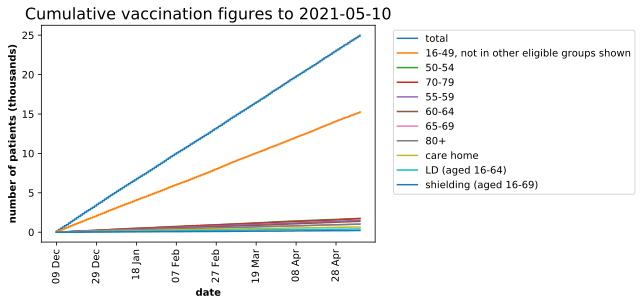

In [3]:
import sys
sys.path.append('../lib/')
from create_report import *
from image_formats import pick_image_format

IMAGE_FORMAT = pick_image_format()

show_chart(f"Cumulative vaccination figures.{IMAGE_FORMAT.extension}", IMAGE_FORMAT, title="off")

## Trends in vaccination rates of 80+ population according to demographic/clinical features, cumulatively by day. <a name='charts80' />
**\*_Latest overall cohort rate_ calculated as at latest date for vaccinations recorded across all TPP practices.**


## 80+ population

###  COVID vaccinations among 80+ population
 ### by Sex

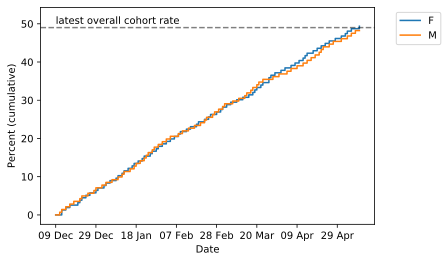

### DateCOVID vaccinations among 80+ population
 ### by Sex

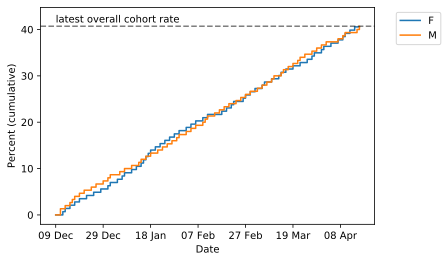

###  COVID vaccinations among 80+ population
 ### by Ethnicity (broad categories)

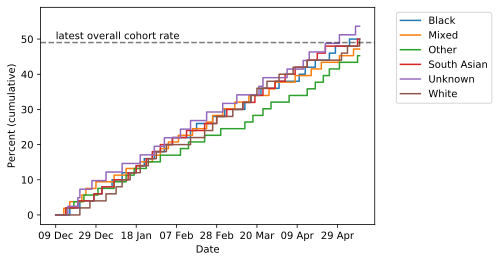

### DateCOVID vaccinations among 80+ population
 ### by Ethnicity (broad categories)

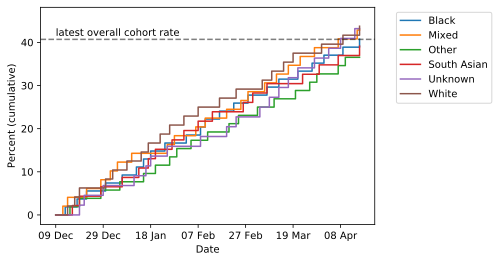

###  COVID vaccinations among 80+ population
 ### by Index of Multiple Deprivation (quintiles)

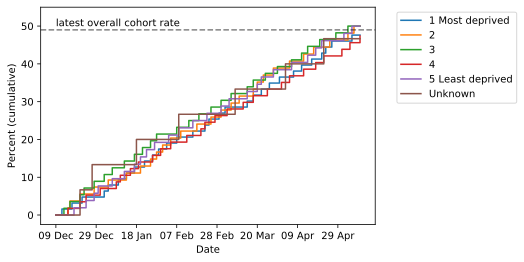

### DateCOVID vaccinations among 80+ population
 ### by Index of Multiple Deprivation (quintiles)

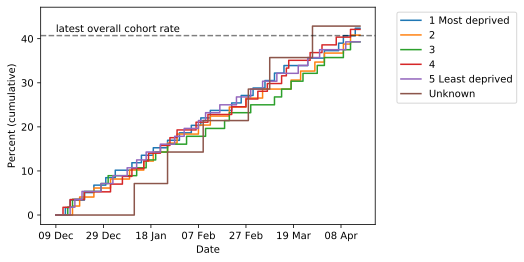

###  COVID vaccinations among 80+ population
 ### by BMI

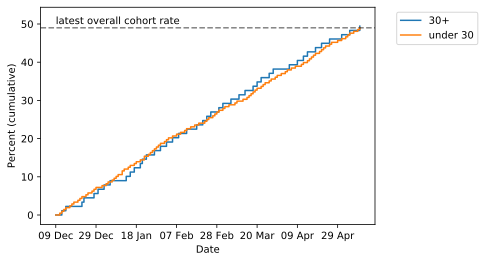

### DateCOVID vaccinations among 80+ population
 ### by BMI

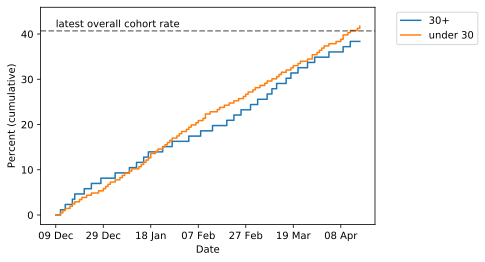

###  COVID vaccinations among 80+ population
 ### by Chronic cardiac disease

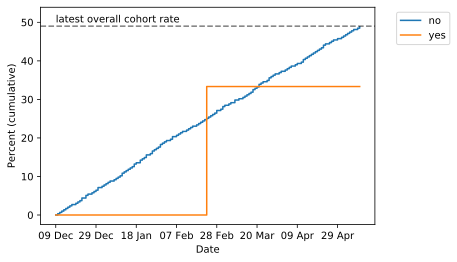

### DateCOVID vaccinations among 80+ population
 ### by Chronic cardiac disease

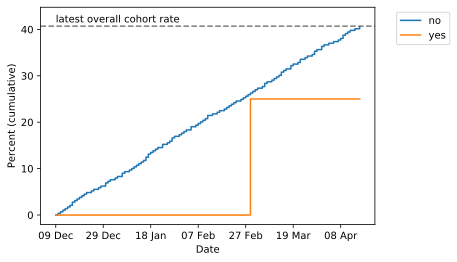

###  COVID vaccinations among 80+ population
 ### by Current COPD

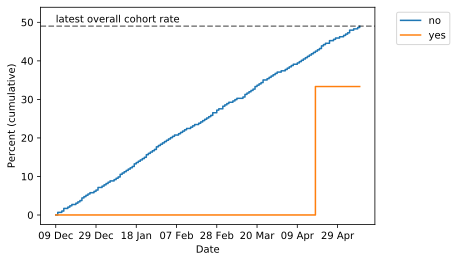

### DateCOVID vaccinations among 80+ population
 ### by Current COPD

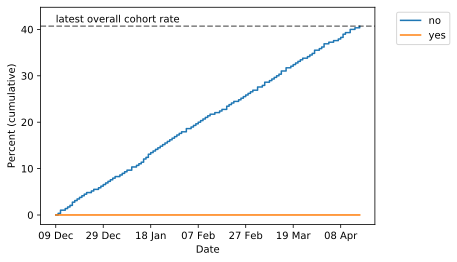

###  COVID vaccinations among 80+ population
 ### by Dialysis

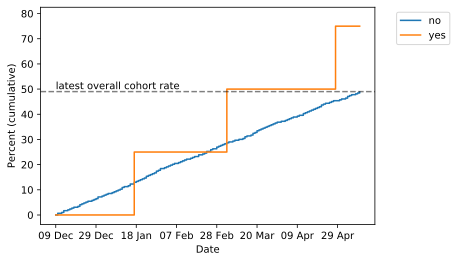

### DateCOVID vaccinations among 80+ population
 ### by Dialysis

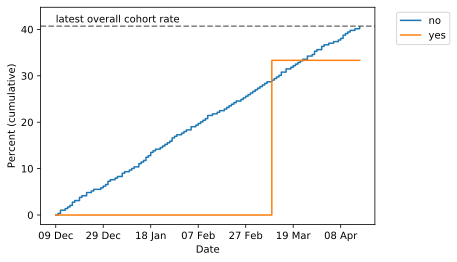

###  COVID vaccinations among 80+ population
 ### by Dementia

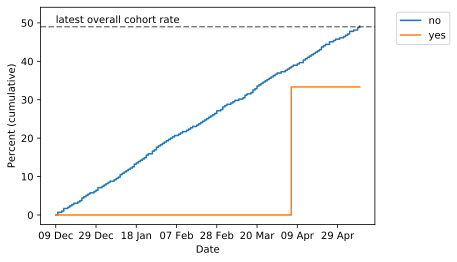

### DateCOVID vaccinations among 80+ population
 ### by Dementia

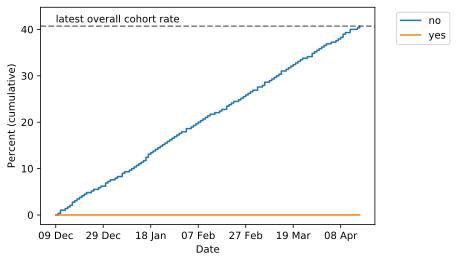

###  COVID vaccinations among 80+ population
 ### by Learning disability

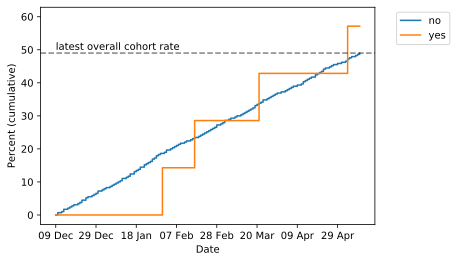

### DateCOVID vaccinations among 80+ population
 ### by Learning disability

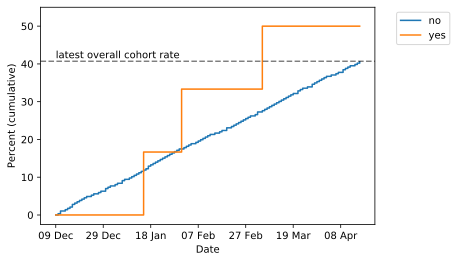

###  COVID vaccinations among 80+ population
 ### by Psychosis, schizophrenia, or bipolar

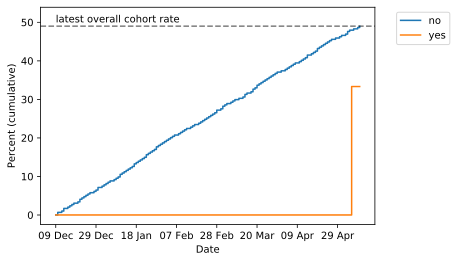

### DateCOVID vaccinations among 80+ population
 ### by Psychosis, schizophrenia, or bipolar

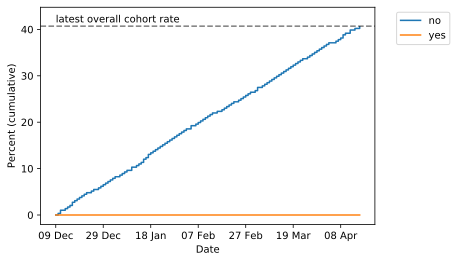

###  COVID vaccinations among 80+ population
 ### by SSRI (last 12 months)

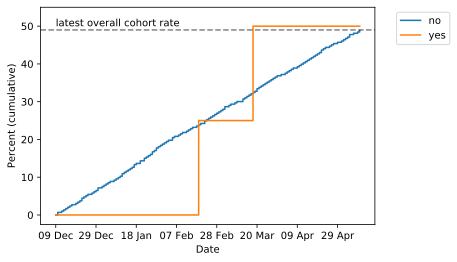

### DateCOVID vaccinations among 80+ population
 ### by SSRI (last 12 months)

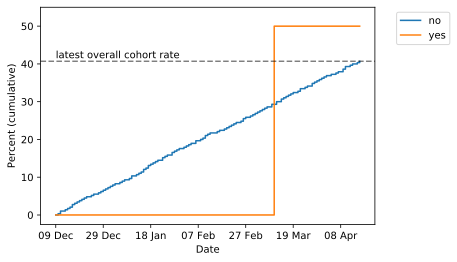

###  COVID vaccinations among 80+ population
 ### by Age band

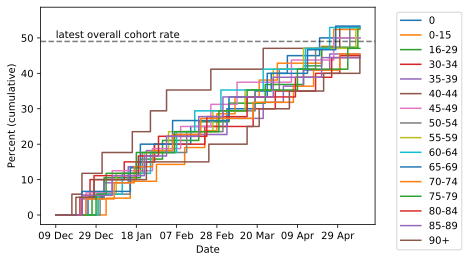

### DateCOVID vaccinations among 80+ population
 ### by Age band

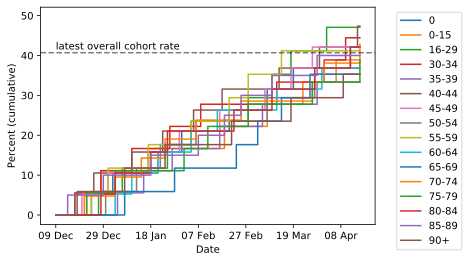

In [4]:
chartlist = find_and_sort_filenames(foldername="figures", file_extension=IMAGE_FORMAT.extension)
   
display(Markdown("## 80+ population"))
for item in chartlist:
    show_chart(item, IMAGE_FORMAT)


## Trends in vaccination rates of 70-79 population according to demographic/clinical features, cumulatively by day. <a name='charts70' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**


## 70-79 population

###  COVID vaccinations among 70-79 population
 ### by Sex

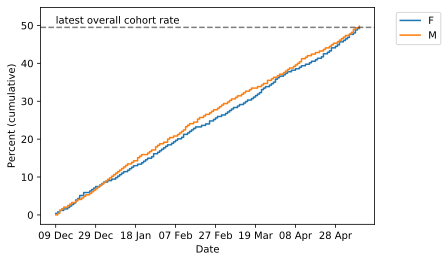

### DateCOVID vaccinations among 70-79 population
 ### by Sex

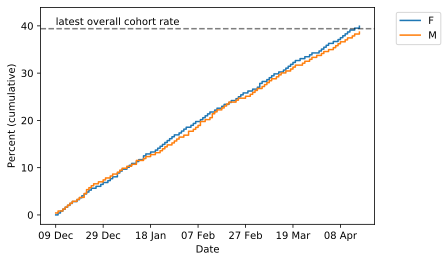

###  COVID vaccinations among 70-79 population
 ### by Ethnicity (broad categories)

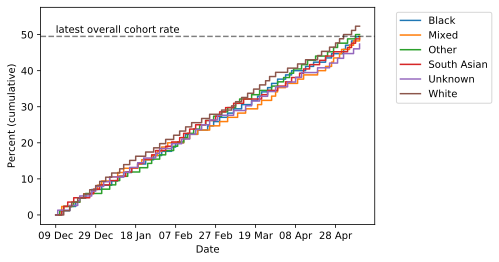

### DateCOVID vaccinations among 70-79 population
 ### by Ethnicity (broad categories)

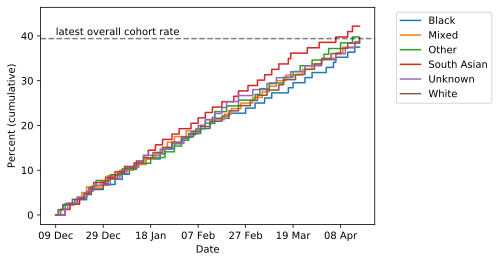

###  COVID vaccinations among 70-79 population
 ### by Index of Multiple Deprivation (quintiles)

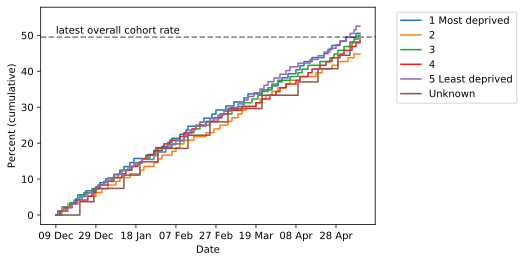

### DateCOVID vaccinations among 70-79 population
 ### by Index of Multiple Deprivation (quintiles)

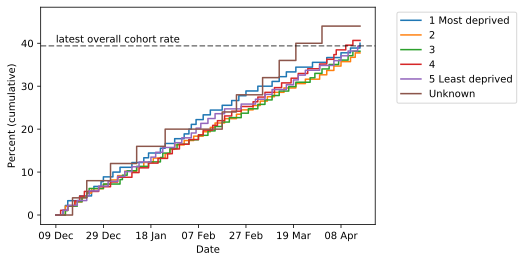

###  COVID vaccinations among 70-79 population
 ### by BMI

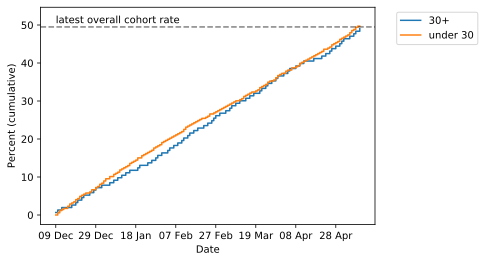

### DateCOVID vaccinations among 70-79 population
 ### by BMI

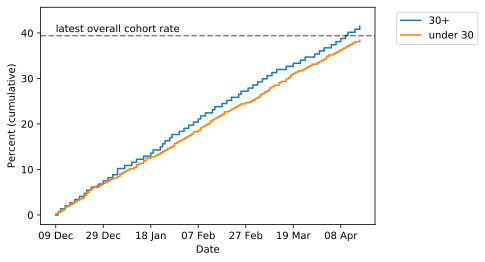

###  COVID vaccinations among 70-79 population
 ### by Chronic cardiac disease

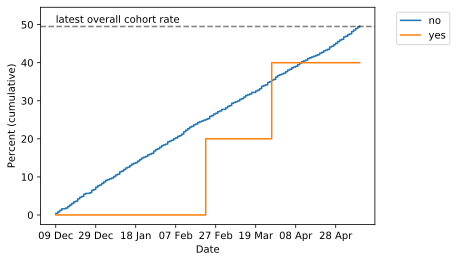

### DateCOVID vaccinations among 70-79 population
 ### by Chronic cardiac disease

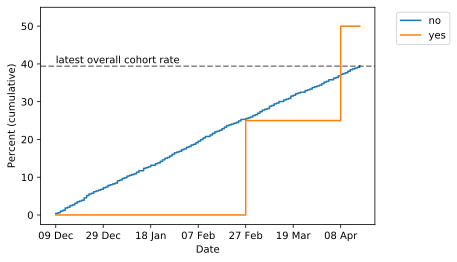

###  COVID vaccinations among 70-79 population
 ### by Current COPD

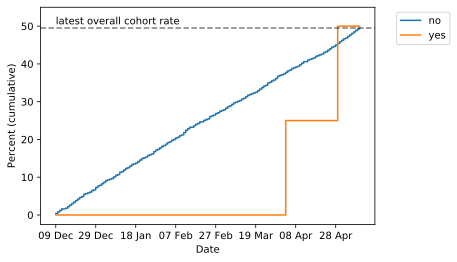

### DateCOVID vaccinations among 70-79 population
 ### by Current COPD

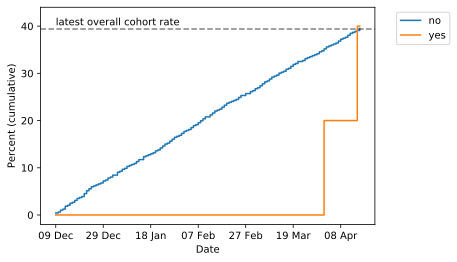

###  COVID vaccinations among 70-79 population
 ### by Dialysis

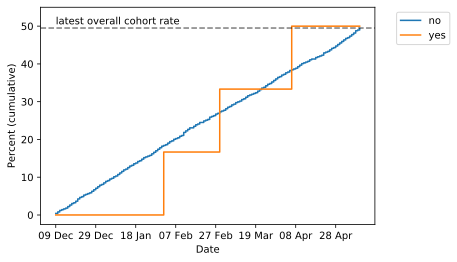

### DateCOVID vaccinations among 70-79 population
 ### by Dialysis

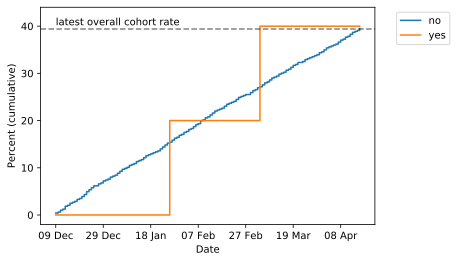

###  COVID vaccinations among 70-79 population
 ### by Dementia

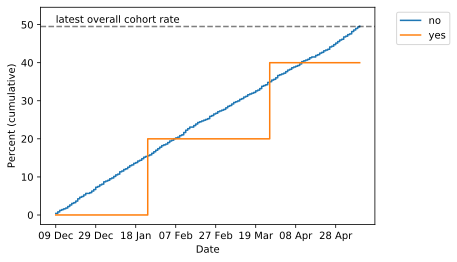

### DateCOVID vaccinations among 70-79 population
 ### by Dementia

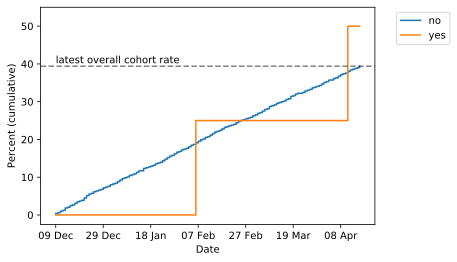

###  COVID vaccinations among 70-79 population
 ### by Learning disability

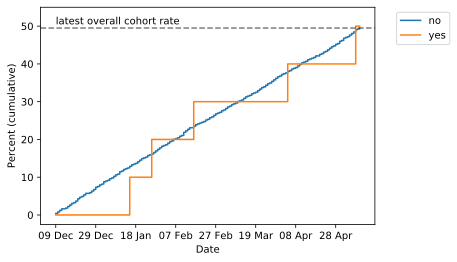

### DateCOVID vaccinations among 70-79 population
 ### by Learning disability

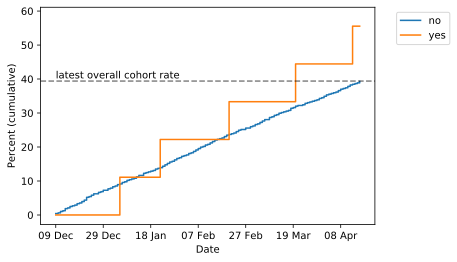

###  COVID vaccinations among 70-79 population
 ### by Psychosis, schizophrenia, or bipolar

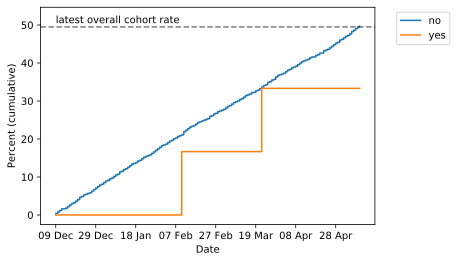

### DateCOVID vaccinations among 70-79 population
 ### by Psychosis, schizophrenia, or bipolar

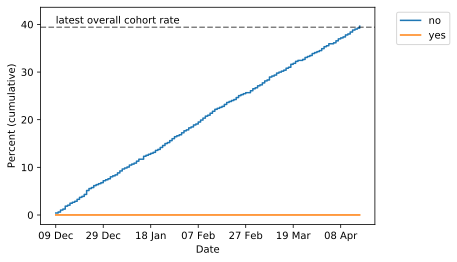

###  COVID vaccinations among 70-79 population
 ### by SSRI (last 12 months)

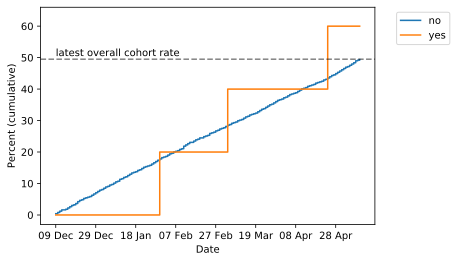

### DateCOVID vaccinations among 70-79 population
 ### by SSRI (last 12 months)

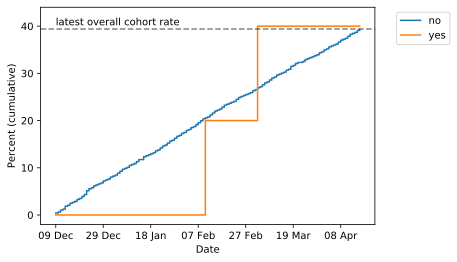

###  COVID vaccinations among 70-79 population
 ### by Age band

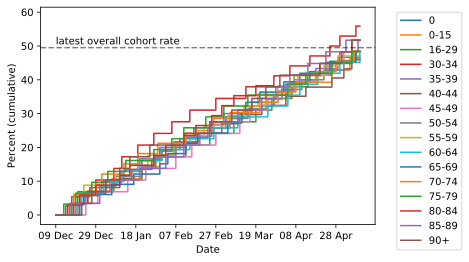

### DateCOVID vaccinations among 70-79 population
 ### by Age band

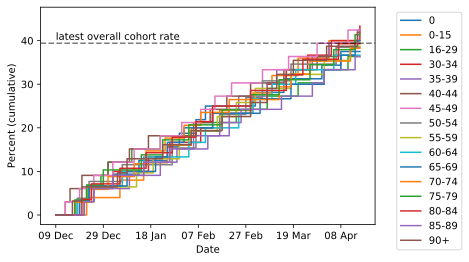

In [5]:
    
display(Markdown("## 70-79 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="70-79", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of **shielding** population according to demographic/clinical features, cumulatively by day. <a name='charts_shield' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

## Shielding population (aged 16-69)

###  COVID vaccinations among shielding (aged 16-69) population
 ### by newly shielded since feb 15

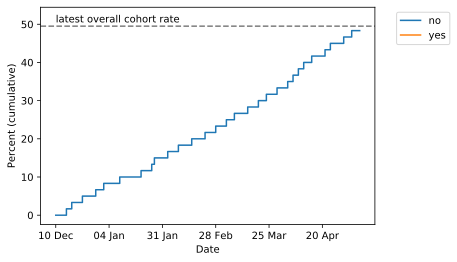

### DateCOVID vaccinations among shielding (aged 16-69) population
 ### by newly shielded since feb 15

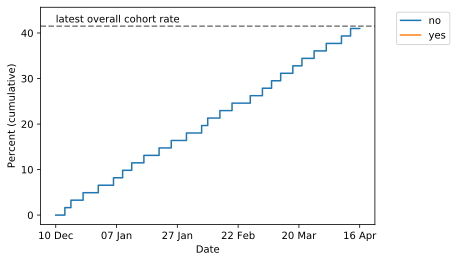

###  COVID vaccinations among shielding (aged 16-69) population
 ### by Age band

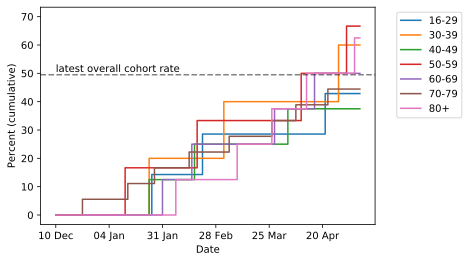

### DateCOVID vaccinations among shielding (aged 16-69) population
 ### by Age band

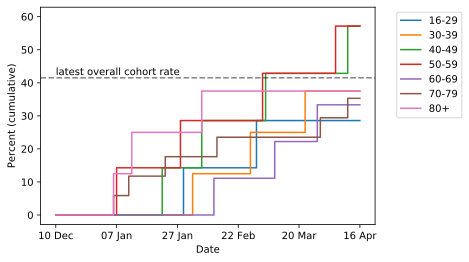

###  COVID vaccinations among shielding (aged 16-69) population
 ### by Sex

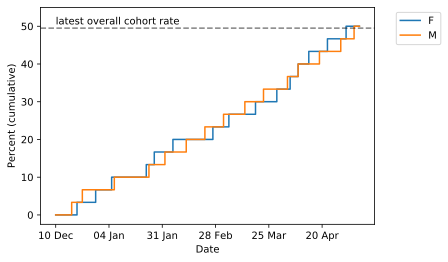

### DateCOVID vaccinations among shielding (aged 16-69) population
 ### by Sex

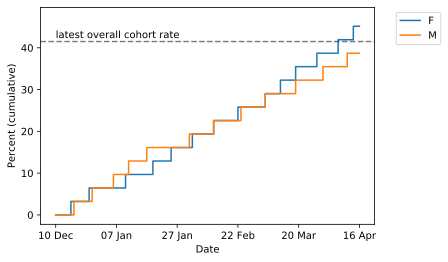

###  COVID vaccinations among shielding (aged 16-69) population
 ### by Ethnicity (broad categories)

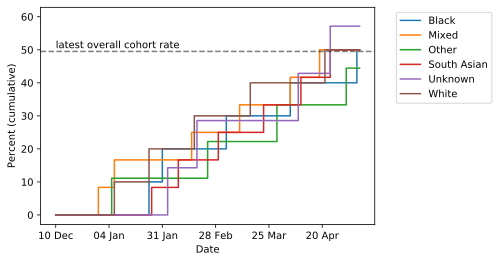

### DateCOVID vaccinations among shielding (aged 16-69) population
 ### by Ethnicity (broad categories)

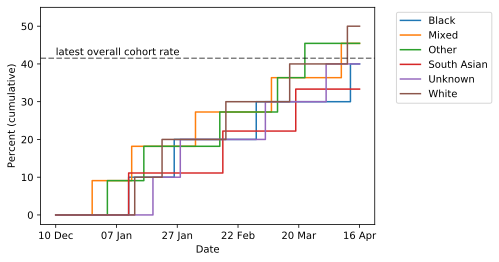

###  COVID vaccinations among shielding (aged 16-69) population
 ### by Index of Multiple Deprivation (quintiles)

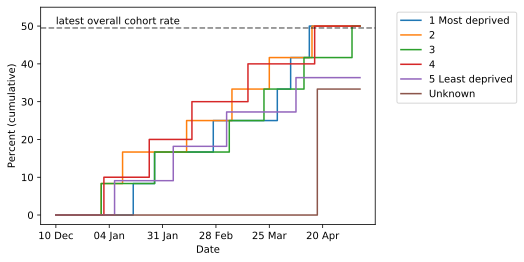

### DateCOVID vaccinations among shielding (aged 16-69) population
 ### by Index of Multiple Deprivation (quintiles)

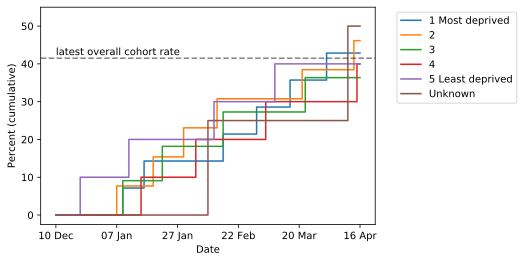

###  COVID vaccinations among shielding (aged 16-69) population
 ### by Learning disability

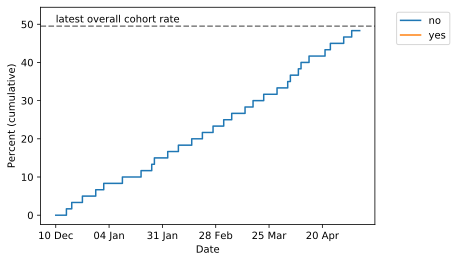

### DateCOVID vaccinations among shielding (aged 16-69) population
 ### by Learning disability

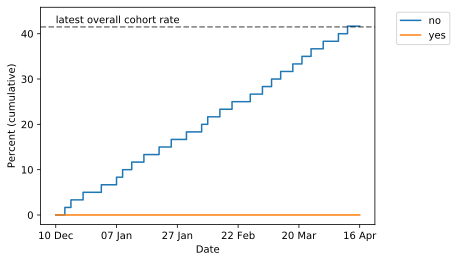

In [6]:
    
display(Markdown("## Shielding population (aged 16-69)"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="shielding (aged 16-69)", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of 65-69 population according to demographic/clinical features, cumulatively by day. <a name='charts65' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

## 65-69 population

###  COVID vaccinations among 65-69 population
 ### by Sex

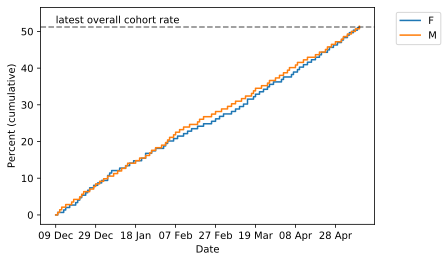

### DateCOVID vaccinations among 65-69 population
 ### by Sex

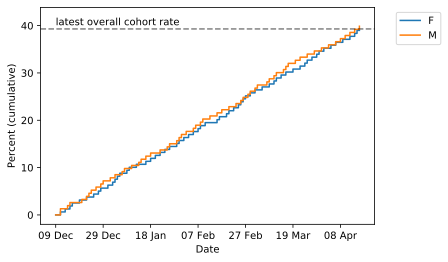

###  COVID vaccinations among 65-69 population
 ### by Ethnicity (broad categories)

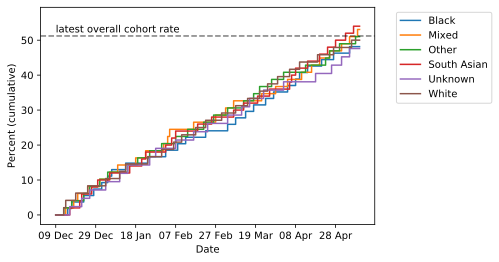

### DateCOVID vaccinations among 65-69 population
 ### by Ethnicity (broad categories)

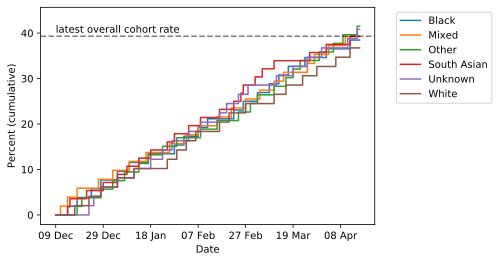

###  COVID vaccinations among 65-69 population
 ### by Index of Multiple Deprivation (quintiles)

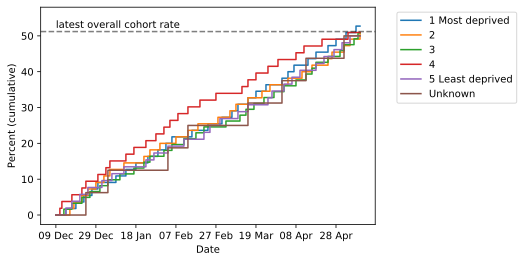

### DateCOVID vaccinations among 65-69 population
 ### by Index of Multiple Deprivation (quintiles)

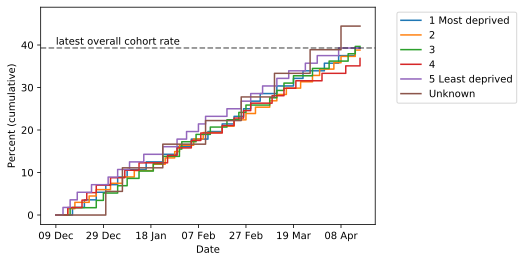

###  COVID vaccinations among 65-69 population
 ### by BMI

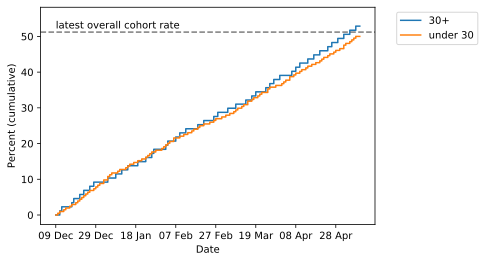

### DateCOVID vaccinations among 65-69 population
 ### by BMI

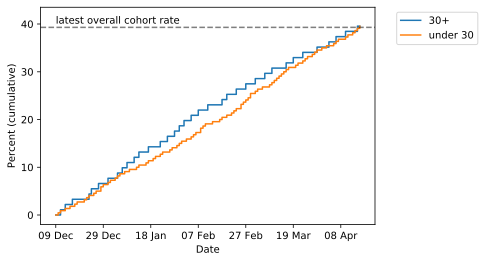

###  COVID vaccinations among 65-69 population
 ### by Chronic cardiac disease

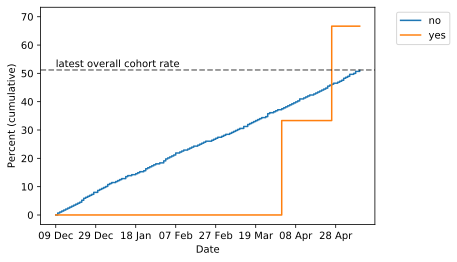

### DateCOVID vaccinations among 65-69 population
 ### by Chronic cardiac disease

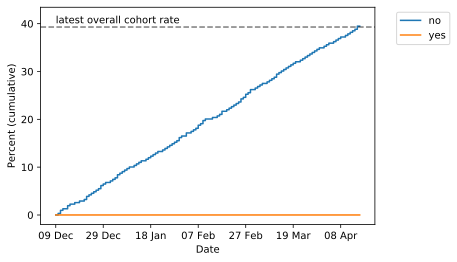

###  COVID vaccinations among 65-69 population
 ### by Current COPD

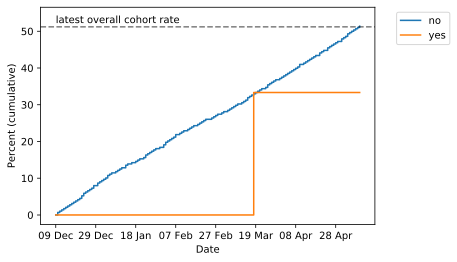

### DateCOVID vaccinations among 65-69 population
 ### by Current COPD

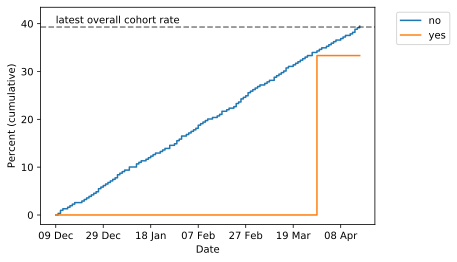

###  COVID vaccinations among 65-69 population
 ### by Dementia

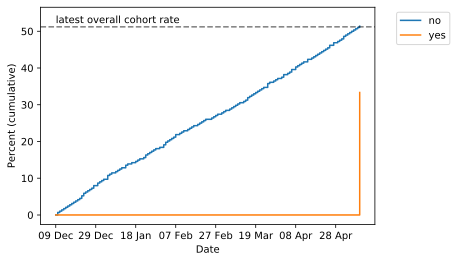

### DateCOVID vaccinations among 65-69 population
 ### by Dementia

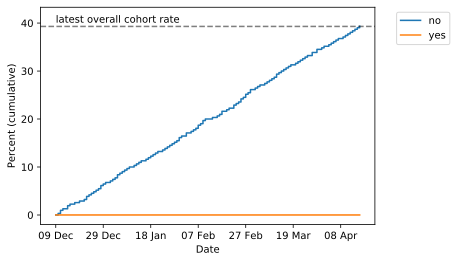

###  COVID vaccinations among 65-69 population
 ### by Learning disability

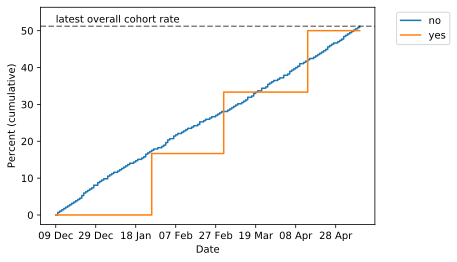

### DateCOVID vaccinations among 65-69 population
 ### by Learning disability

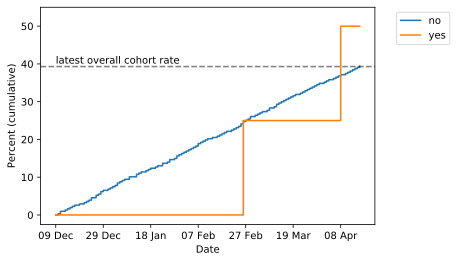

###  COVID vaccinations among 65-69 population
 ### by Psychosis, schizophrenia, or bipolar

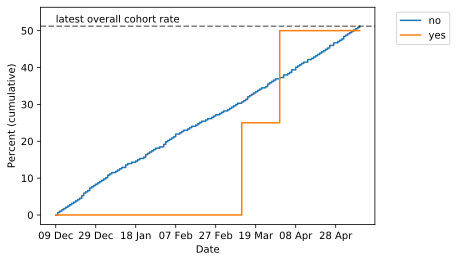

### DateCOVID vaccinations among 65-69 population
 ### by Psychosis, schizophrenia, or bipolar

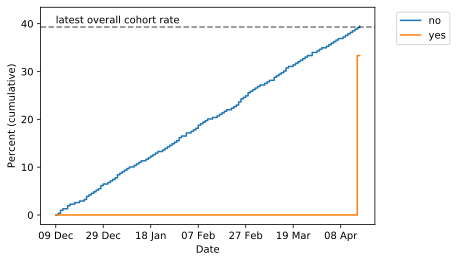

###  COVID vaccinations among 65-69 population
 ### by SSRI (last 12 months)

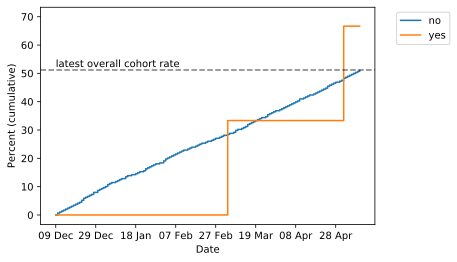

### DateCOVID vaccinations among 65-69 population
 ### by SSRI (last 12 months)

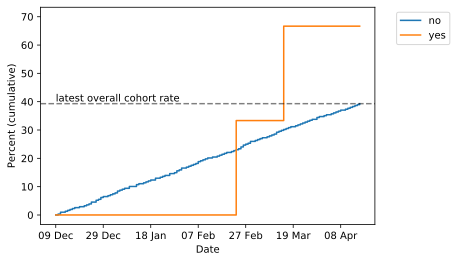

In [7]:
    
display(Markdown("## 65-69 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="65-69", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of 60-64 population according to demographic/clinical features, cumulatively by day. <a name='charts60' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

## 60-64 population

###  COVID vaccinations among 60-64 population
 ### by Sex

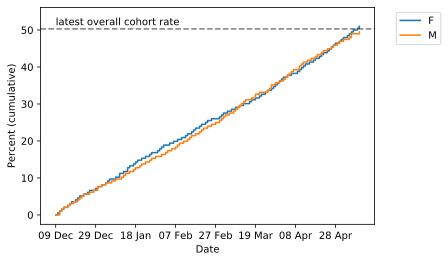

### DateCOVID vaccinations among 60-64 population
 ### by Sex

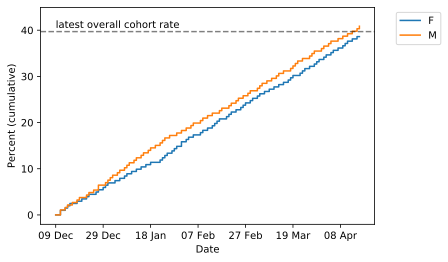

###  COVID vaccinations among 60-64 population
 ### by Ethnicity (broad categories)

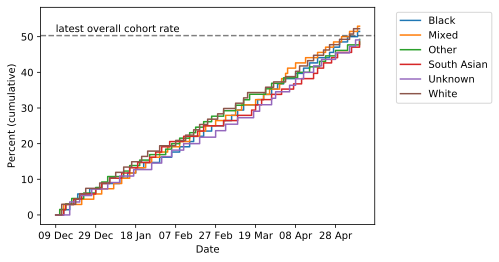

### DateCOVID vaccinations among 60-64 population
 ### by Ethnicity (broad categories)

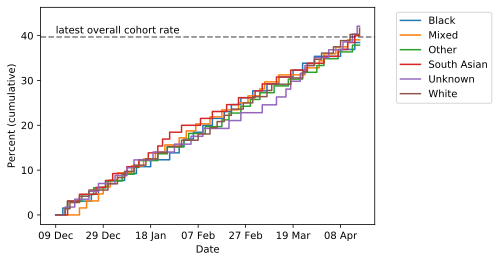

###  COVID vaccinations among 60-64 population
 ### by Index of Multiple Deprivation (quintiles)

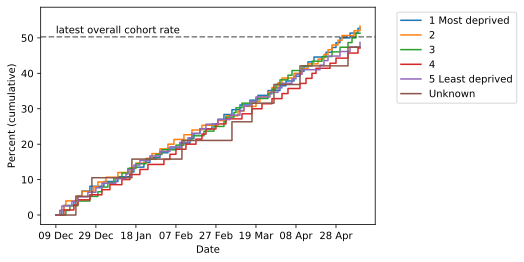

### DateCOVID vaccinations among 60-64 population
 ### by Index of Multiple Deprivation (quintiles)

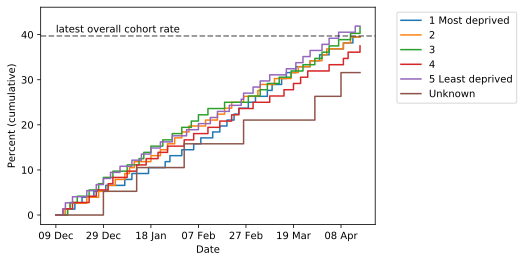

###  COVID vaccinations among 60-64 population
 ### by BMI

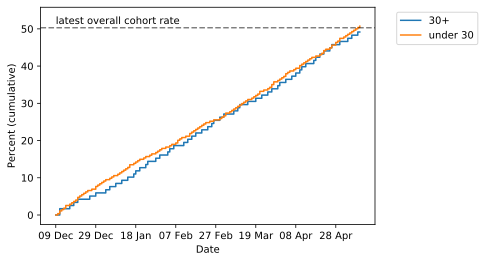

### DateCOVID vaccinations among 60-64 population
 ### by BMI

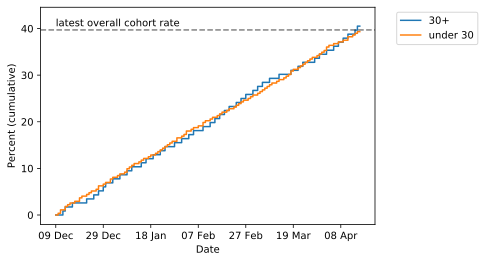

###  COVID vaccinations among 60-64 population
 ### by Chronic cardiac disease

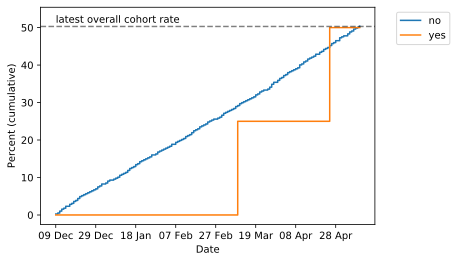

### DateCOVID vaccinations among 60-64 population
 ### by Chronic cardiac disease

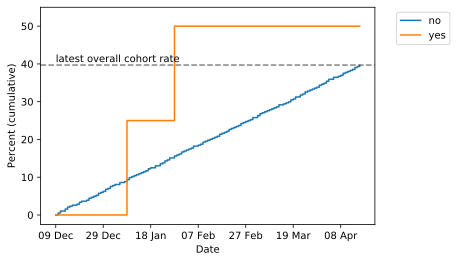

###  COVID vaccinations among 60-64 population
 ### by Current COPD

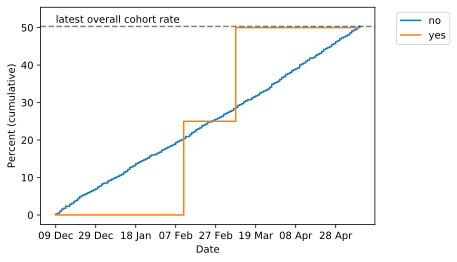

### DateCOVID vaccinations among 60-64 population
 ### by Current COPD

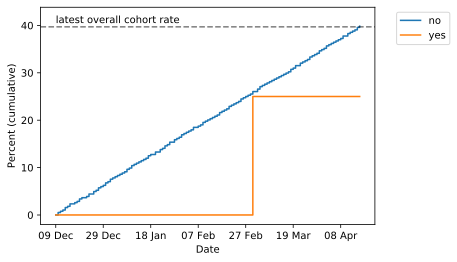

###  COVID vaccinations among 60-64 population
 ### by Dementia

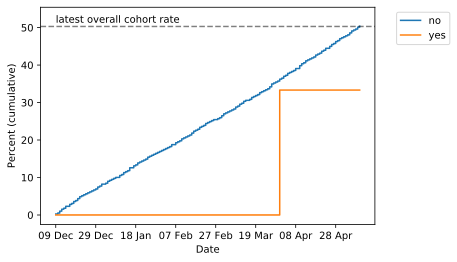

### DateCOVID vaccinations among 60-64 population
 ### by Dementia

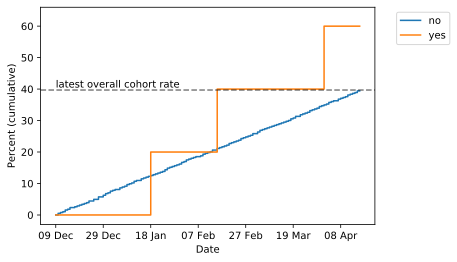

###  COVID vaccinations among 60-64 population
 ### by Psychosis, schizophrenia, or bipolar

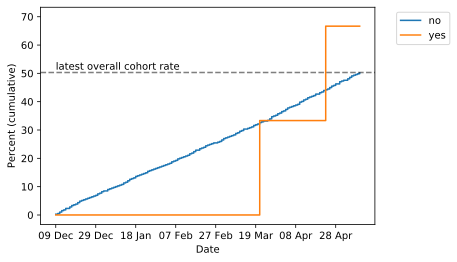

### DateCOVID vaccinations among 60-64 population
 ### by Psychosis, schizophrenia, or bipolar

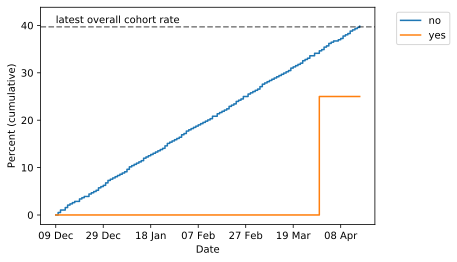

###  COVID vaccinations among 60-64 population
 ### by SSRI (last 12 months)

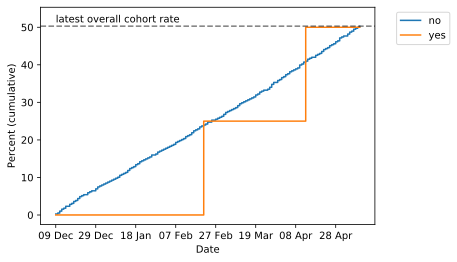

### DateCOVID vaccinations among 60-64 population
 ### by SSRI (last 12 months)

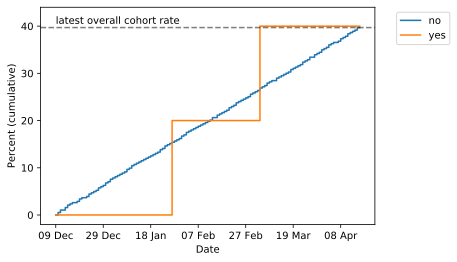

In [8]:
display(Markdown("## 60-64 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="60-64", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of 55-59 population according to demographic/clinical features, cumulatively by day. <a name='charts55' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

## 55-59 population

###  COVID vaccinations among 55-59 population
 ### by Sex

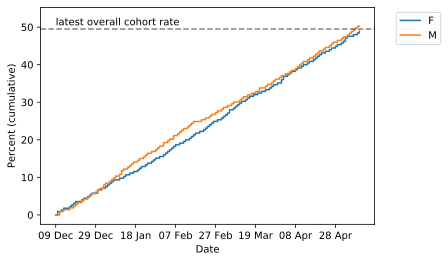

### DateCOVID vaccinations among 55-59 population
 ### by Sex

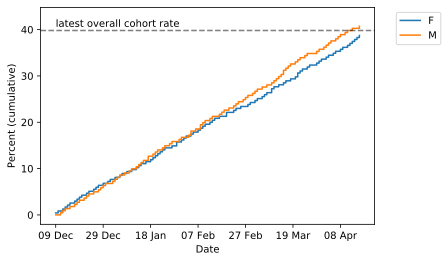

###  COVID vaccinations among 55-59 population
 ### by Ethnicity (broad categories)

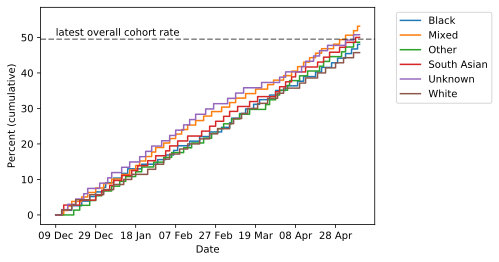

### DateCOVID vaccinations among 55-59 population
 ### by Ethnicity (broad categories)

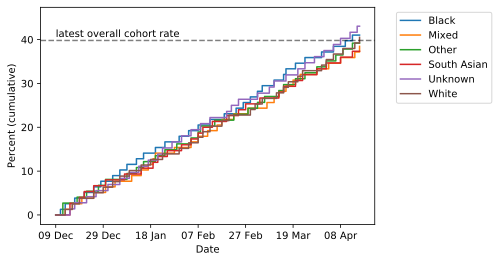

###  COVID vaccinations among 55-59 population
 ### by Index of Multiple Deprivation (quintiles)

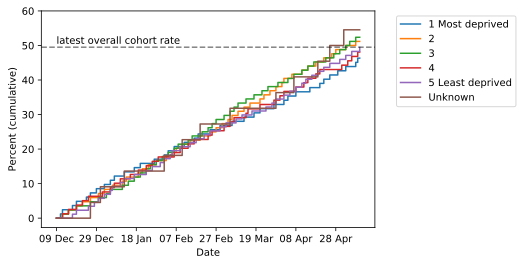

### DateCOVID vaccinations among 55-59 population
 ### by Index of Multiple Deprivation (quintiles)

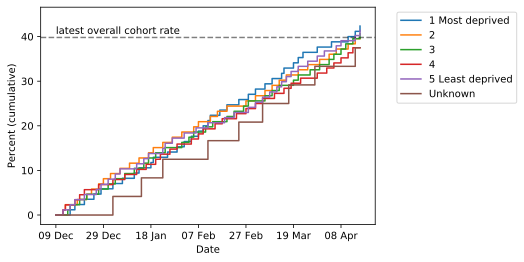

###  COVID vaccinations among 55-59 population
 ### by BMI

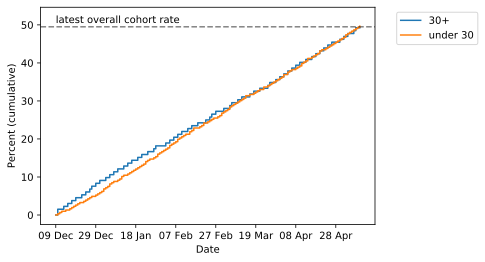

### DateCOVID vaccinations among 55-59 population
 ### by BMI

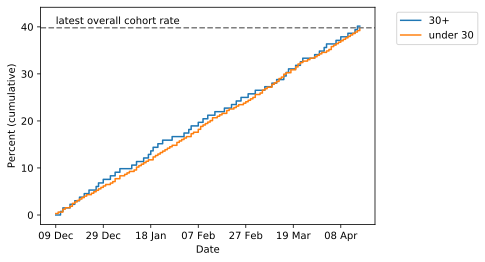

###  COVID vaccinations among 55-59 population
 ### by Chronic cardiac disease

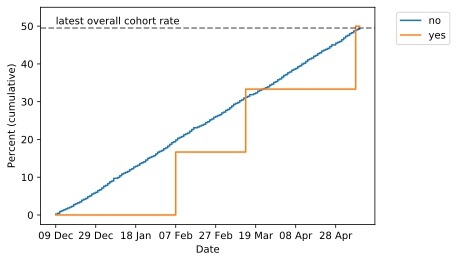

### DateCOVID vaccinations among 55-59 population
 ### by Chronic cardiac disease

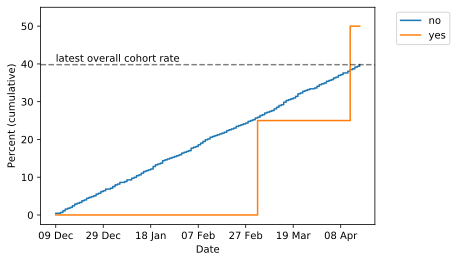

###  COVID vaccinations among 55-59 population
 ### by Current COPD

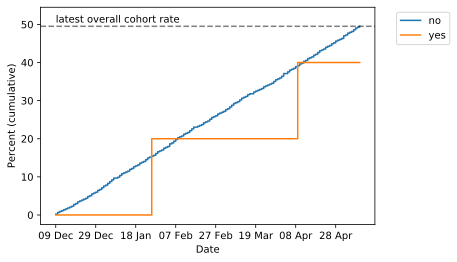

### DateCOVID vaccinations among 55-59 population
 ### by Current COPD

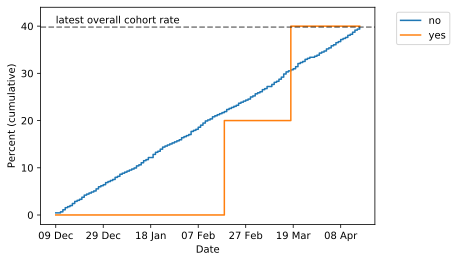

###  COVID vaccinations among 55-59 population
 ### by Psychosis, schizophrenia, or bipolar

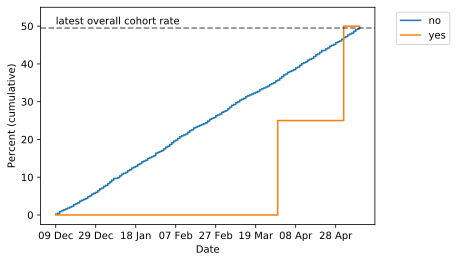

### DateCOVID vaccinations among 55-59 population
 ### by Psychosis, schizophrenia, or bipolar

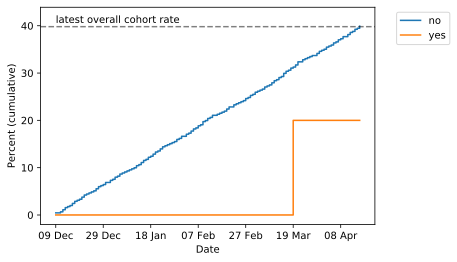

###  COVID vaccinations among 55-59 population
 ### by SSRI (last 12 months)

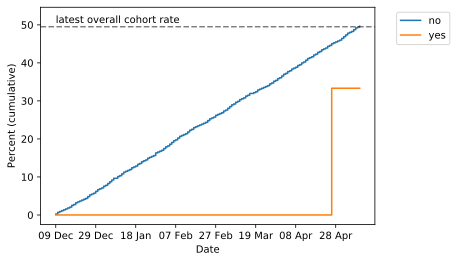

### DateCOVID vaccinations among 55-59 population
 ### by SSRI (last 12 months)

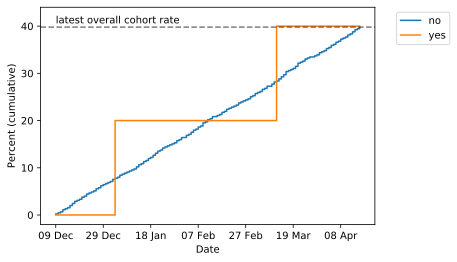

In [9]:
display(Markdown("## 55-59 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="55-59", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of 50-54 population according to demographic/clinical features, cumulatively by day. <a name='charts50' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

## 50-54 population

###  COVID vaccinations among 50-54 population
 ### by Sex

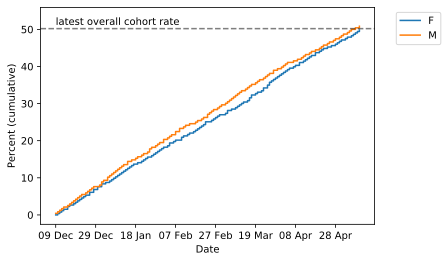

### DateCOVID vaccinations among 50-54 population
 ### by Sex

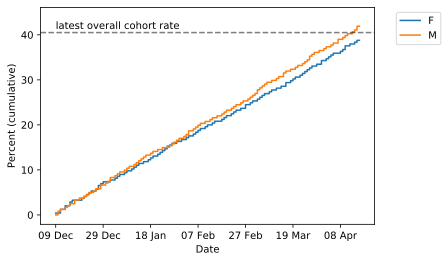

###  COVID vaccinations among 50-54 population
 ### by Ethnicity (broad categories)

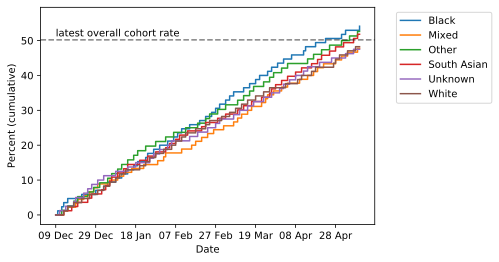

### DateCOVID vaccinations among 50-54 population
 ### by Ethnicity (broad categories)

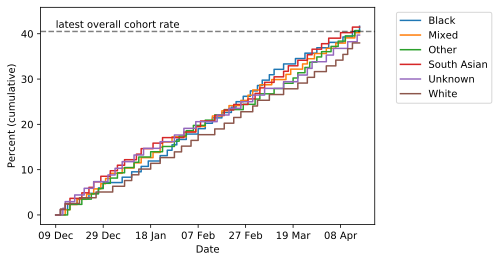

###  COVID vaccinations among 50-54 population
 ### by Index of Multiple Deprivation (quintiles)

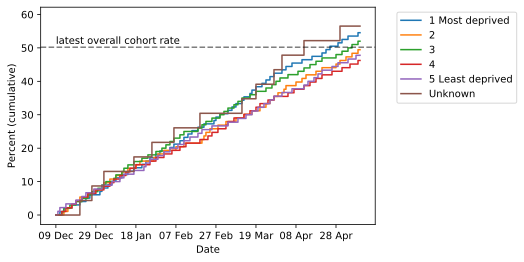

### DateCOVID vaccinations among 50-54 population
 ### by Index of Multiple Deprivation (quintiles)

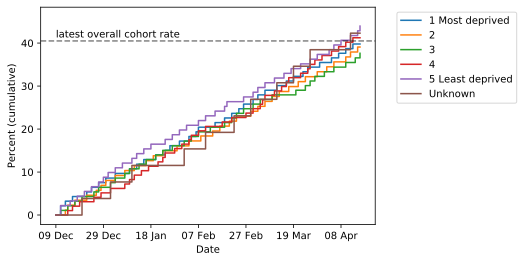

###  COVID vaccinations among 50-54 population
 ### by BMI

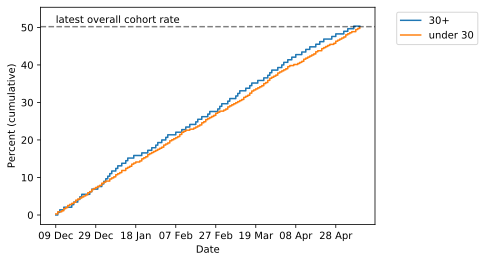

### DateCOVID vaccinations among 50-54 population
 ### by BMI

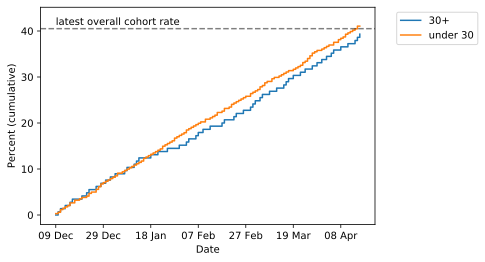

###  COVID vaccinations among 50-54 population
 ### by Chronic cardiac disease

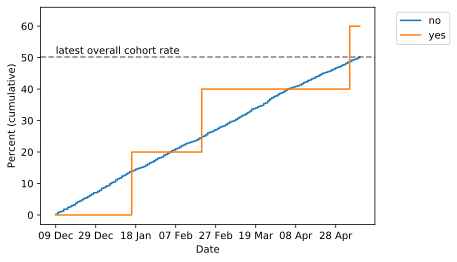

### DateCOVID vaccinations among 50-54 population
 ### by Chronic cardiac disease

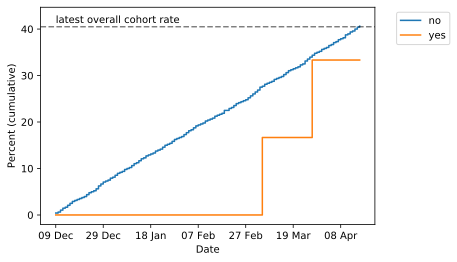

###  COVID vaccinations among 50-54 population
 ### by Current COPD

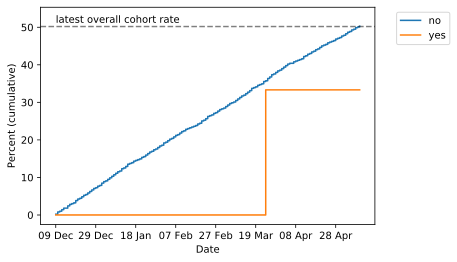

### DateCOVID vaccinations among 50-54 population
 ### by Current COPD

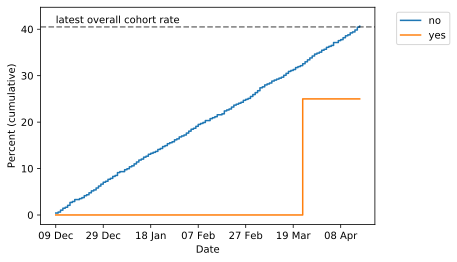

###  COVID vaccinations among 50-54 population
 ### by Psychosis, schizophrenia, or bipolar

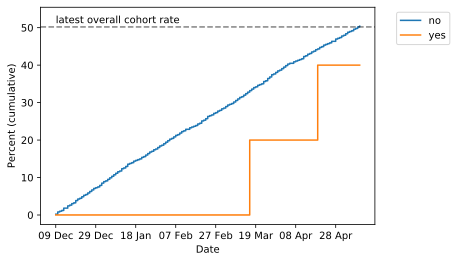

### DateCOVID vaccinations among 50-54 population
 ### by Psychosis, schizophrenia, or bipolar

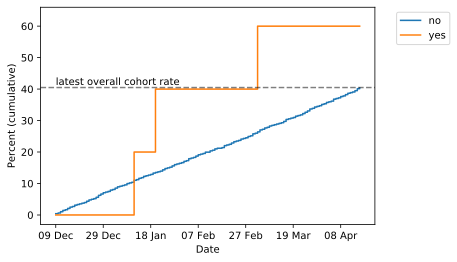

###  COVID vaccinations among 50-54 population
 ### by SSRI (last 12 months)

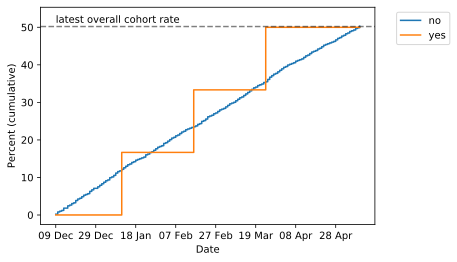

### DateCOVID vaccinations among 50-54 population
 ### by SSRI (last 12 months)

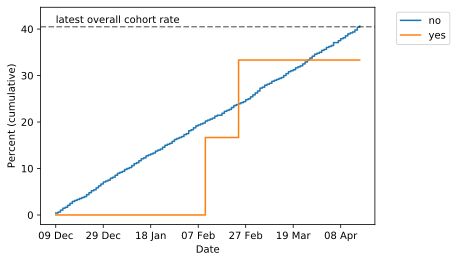

In [10]:
display(Markdown("## 50-54 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="50-54", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

# 
## Vaccination rates of each eligible population group, according to demographic/clinical features  <a name='tables' />

In [11]:
tablelist = find_and_sort_filenames("tables", by_demographics_or_population="population", 
                            pre_string="among ", tail_string=" population.csv",
                            population_subset="Cumulative vaccination figures",
                            files_to_exclude=[])
    
for filename in tablelist:
    df, title = import_table(filename, latest_date_fmt, show_carehomes=True, suffix=suffix)
    show_table(df, title, latest_date_fmt, show_carehomes=True)

## 
 ## Cumulative vaccination figures among 80+ population 
 Please refer to footnotes below table for information.

Vaccinated at 10 May (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1019   
Sex                                       F                                                         539   
                                          M                                                         476   
Age band                                  0                                                          70   
                                          0-15                                                       77   
                                          16-29                                                      70   
                                          30-34                                                      63   
                                          35-39                                                      70   
                                          40-44                                                      63   
                                          45-49                                                      56   
                                          50-54                                                      63   
                                          55-59                                                      63   
                                          60-64                                                      63   
                                          65-69                                                      56   
                                          70-74                                                      70   
                                          75-79                                                      56   
                                          80-84                                                      56   
                                          85-89                                                      56   
                                          90+                                                        63   
Ethnicity (broad categories)              Black                                                     175   
                                          Mixed                                                     175   
                                          Other                                                     168   
                                          South Asian                                               175   
                                          Unknown                                                   154   
                                          White                                                     175   
ethnicity 16 groups                        African                                                   49   
                                           Bangladeshi or British Bangladeshi                        63   
                                           Caribbean                                                 42   
                                           Chinese                                                   56   
                                           Other                                                     63   
                                           Other Asian                                               56   
                                          British or Mixed British                                   63   
                                          Indian or British Indian                                   56   
                                          Irish                                                      42   
                                          Other Black                                                63   
                                          Other White                                                56   
             

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among 70-79 population 
 Please refer to footnotes below table for information.

Vaccinated at 10 May (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1729   
Sex                                       F                                                         875   
                                          M                                                         854   
Age band                                  0                                                         112   
                                          0-15                                                       91   
                                          16-29                                                      98   
                                          30-34                                                     105   
                                          35-39                                                      98   
                                          40-44                                                     119   
                                          45-49                                                     105   
                                          50-54                                                     119   
                                          55-59                                                     112   
                                          60-64                                                     105   
                                          65-69                                                     112   
                                          70-74                                                     112   
                                          75-79                                                     105   
                                          80-84                                                     133   
                                          85-89                                                     105   
                                          90+                                                       105   
Ethnicity (broad categories)              Black                                                     294   
                                          Mixed                                                     294   
                                          Other                                                     294   
                                          South Asian                                               287   
                                          Unknown                                                   252   
                                          White                                                     315   
ethnicity 16 groups                        African                                                   91   
                                           Bangladeshi or British Bangladeshi                        91   
                                           Caribbean                                                 91   
                                           Chinese                                                   91   
                                           Other                                                     98   
                                           Other Asian                                               70   
                                          British or Mixed British                                  105   
                                          Indian or British Indian                                  105   
                                          Irish                                                      91   
                                          Other Black                                                77   
                                          Other White                                                84   
             

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among care home population 
 Please refer to footnotes below table for information.

Vaccinated at 10 May (n)  \
Category                     Group                                   
overall                      overall                           668   
Sex                          F                                 343   
                             M                                 322   
Age band                     0                                  49   
                             0-15                               35   
                             16-29                              42   
                             30-34                              42   
                             35-39                              35   
                             40-44                              49   
                             45-49                              42   
                             50-54                              42   
                             55-59                              28   
                             60-64                              49   
                             65-69                              49   
                             70-74                              42   
                             75-79                              42   
                             80-84                              35   
                             85-89                              49   
                             90+                                35   
Ethnicity (broad categories) Black                             126   
                             Mixed                             112   
                             Other                             112   
                             South Asian                       112   
                             Unknown                           105   
                             White                             105   
Dementia                     no                                658   
                             yes                                 7   

                                          Vaccinated at 10 May (%)  \
Category                     Group                                   
overall                      overall                          48.4   
Sex                          F                                49.5   
                             M                                46.9   
Age band                     0                                50.0   
                             0-15                             41.7   
                             16-29                            42.9   
                             30-34                            46.2   
                             35-39                            41.7   
                             40-44                            46.7   
                             45-49                            46.2   
                             50-54                            54.5   
                             55-59                            40.0   
                             60-64                            50.0   
                             65-69                            53.8   
                             70-74                            50.0   
                             75-79                            50.0   
                             80-84                            45.5   
                             85-89                            58.3   
                             90+                              45.5   
Ethnicity (broad categories) Black                            51.4   
                             Mixed                            43.2   
                             Other                            51.6   
                             South Asian                      48.5   
                             Unknown                          50.0   
                             White                            46.9   
Dementia                     no                               48.2   
                             yes                   

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population includes those known to live in an elderly care home, based upon clinical coding.

## 
 ## Cumulative vaccination figures among shielding (aged 16-69) population 
 Please refer to footnotes below table for information.

Vaccinated at 10 May (n)  \
Category                                  Group                                        
overall                                   overall                                208   
newly shielded since feb 15               no                                     203   
                                          yes                                      0   
Sex                                       F                                      105   
                                          M                                      105   
Age band                                  16-29                                   21   
                                          30-39                                   21   
                                          40-49                                   21   
                                          50-59                                   28   
                                          60-69                                   28   
                                          70-79                                   56   
                                          80+                                     35   
Ethnicity (broad categories)              Black                                   35   
                                          Mixed                                   42   
                                          Other                                   28   
                                          South Asian                             42   
                                          Unknown                                 28   
                                          White                                   35   
Index of Multiple Deprivation (quintiles) 1 Most deprived                         42   
                                          2                                       42   
                                          3                                       42   
                                          4                                       35   
                                          5 Least deprived                        28   
                                          Unknown                                  7   
Learning disability                       no                                     203   
                                          yes                                      0   

                                                            Vaccinated at 10 May (%)  \
Category                                  Group                                        
overall                                   overall                               49.5   
newly shielded since feb 15               no                                    48.3   
                                          yes                                    0.0   
Sex                                       F                                     50.0   
                                          M                                     50.0   
Age band                                  16-29                                 42.9   
                                          30-39                                 60.0   
                                          40-49                                 37.5   
                                          50-59                                 66.7   
                                          60-69                                 50.0   
                                          70-79                                 44.4   
                                          80+                                   62.5   
Ethnicity (broad categories)              Black                                 50.0   
                                          Mixed                                 50.0   
                                          Other                                 44.4   
                                          South Asian                           50.0   
           

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those over 65 known to live in an elderly care home, based upon clinical coding.

## 
 ## Cumulative vaccination figures among 65-69 population 
 Please refer to footnotes below table for information.

Vaccinated at 10 May (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1042   
Sex                                       F                                                         532   
                                          M                                                         511   
Ethnicity (broad categories)              Black                                                     182   
                                          Mixed                                                     182   
                                          Other                                                     175   
                                          South Asian                                               189   
                                          Unknown                                                   140   
                                          White                                                     168   
ethnicity 16 groups                        African                                                   49   
                                           Bangladeshi or British Bangladeshi                        56   
                                           Caribbean                                                 63   
                                           Chinese                                                   49   
                                           Other                                                     63   
                                           Other Asian                                               63   
                                          British or Mixed British                                   77   
                                          Indian or British Indian                                   63   
                                          Irish                                                      63   
                                          Other Black                                                49   
                                          Other White                                                49   
                                          Other mixed                                                63   
                                          Pakistani or British Pakistani                             56   
                                          Unknown                                                   154   
                                          White + Asian                                              42   
                                          White + Black African                                      35   
                                          White + Black Caribbean                                    56   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           203   
                                          2                                                         196   
                                          3                                                         217   
                                          4                                                         189   
                                          5 Least deprived                                          182   
                                          Unknown                                                    56   
BMI                                       30+                                                       322   
                                          under 30                                                  714   
Chronic cardiac disease                   no                                                       1029   
                                          yes                                                        14   
Current COPD 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- Population excludes those who are currently shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among LD (aged 16-64) population 
 Please refer to footnotes below table for information.

Vaccinated at 10 May (n)  \
Category                     Group                                   
overall                      overall                           414   
Sex                          F                                 224   
                             M                                 189   
Age band                     0                                  28   
                             0-15                               21   
                             16-29                              28   
                             30-34                              28   
                             35-39                              28   
                             40-44                              28   
                             45-49                              21   
                             50-54                              21   
                             55-59                              21   
                             60-64                              35   
                             65-69                              28   
                             70-74                              28   
                             75-79                              28   
                             80-84                              21   
                             85-89                              28   
                             90+                                21   
Ethnicity (broad categories) Black                              84   
                             Mixed                              63   
                             Other                              77   
                             South Asian                        63   
                             Unknown                            56   
                             White                              63   

                                          Vaccinated at 10 May (%)  \
Category                     Group                                   
overall                      overall                          51.4   
Sex                          F                                51.6   
                             M                                50.9   
Age band                     0                                57.1   
                             0-15                             42.9   
                             16-29                            57.1   
                             30-34                            66.7   
                             35-39                            66.7   
                             40-44                            44.4   
                             45-49                            50.0   
                             50-54                            42.9   
                             55-59                            42.9   
                             60-64                            62.5   
                             65-69                            50.0   
                             70-74                            57.1   
                             75-79                            50.0   
                             80-84                            42.9   
                             85-89                            57.1   
                             90+                              42.9   
Ethnicity (broad categories) Black                            60.0   
                             Mixed                            42.9   
                             Other                            57.9   
                             South Asian                      45.0   
                             Unknown                          47.1   
                             White                            52.9   

                                          Total eligible  \
Category                     Group                         
overall                      overall                 805   
Sex                          F                       434   
                    

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are currently shielding.

## 
 ## Cumulative vaccination figures among 60-64 population 
 Please refer to footnotes below table for information.

Vaccinated at 10 May (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1379   
Sex                                       F                                                         700   
                                          M                                                         679   
Ethnicity (broad categories)              Black                                                     245   
                                          Mixed                                                     252   
                                          Other                                                     224   
                                          South Asian                                               231   
                                          Unknown                                                   189   
                                          White                                                     245   
ethnicity 16 groups                        African                                                   77   
                                           Bangladeshi or British Bangladeshi                        77   
                                           Caribbean                                                 63   
                                           Chinese                                                   77   
                                           Other                                                     63   
                                           Other Asian                                               63   
                                          British or Mixed British                                   84   
                                          Indian or British Indian                                   70   
                                          Irish                                                      84   
                                          Other Black                                                70   
                                          Other White                                                63   
                                          Other mixed                                                84   
                                          Pakistani or British Pakistani                             77   
                                          Unknown                                                   217   
                                          White + Asian                                              77   
                                          White + Black African                                      70   
                                          White + Black Caribbean                                    63   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           273   
                                          2                                                         280   
                                          3                                                         273   
                                          4                                                         231   
                                          5 Least deprived                                          266   
                                          Unknown                                                    63   
BMI                                       30+                                                       406   
                                          under 30                                                  973   
Chronic cardiac disease                   no                                                       1365   
                                          yes                                                        14   
Current COPD 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are currently shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among 55-59 population 
 Please refer to footnotes below table for information.

Vaccinated at 10 May (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1517   
Sex                                       F                                                         770   
                                          M                                                         749   
Ethnicity (broad categories)              Black                                                     259   
                                          Mixed                                                     294   
                                          Other                                                     252   
                                          South Asian                                               252   
                                          Unknown                                                   238   
                                          White                                                     224   
ethnicity 16 groups                        African                                                   77   
                                           Bangladeshi or British Bangladeshi                        98   
                                           Caribbean                                                 91   
                                           Chinese                                                   84   
                                           Other                                                     63   
                                           Other Asian                                               84   
                                          British or Mixed British                                   70   
                                          Indian or British Indian                                   63   
                                          Irish                                                      77   
                                          Other Black                                                91   
                                          Other White                                                91   
                                          Other mixed                                                63   
                                          Pakistani or British Pakistani                             77   
                                          Unknown                                                   224   
                                          White + Asian                                              84   
                                          White + Black African                                      77   
                                          White + Black Caribbean                                    91   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           266   
                                          2                                                         301   
                                          3                                                         308   
                                          4                                                         266   
                                          5 Least deprived                                          301   
                                          Unknown                                                    84   
BMI                                       30+                                                       455   
                                          under 30                                                 1064   
Chronic cardiac disease                   no                                                       1498   
                                          yes                                                        21   
Current COPD 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are currently shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among 50-54 population 
 Please refer to footnotes below table for information.

Vaccinated at 10 May (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1753   
Sex                                       F                                                         917   
                                          M                                                         840   
Ethnicity (broad categories)              Black                                                     322   
                                          Mixed                                                     301   
                                          Other                                                     280   
                                          South Asian                                               301   
                                          Unknown                                                   266   
                                          White                                                     287   
ethnicity 16 groups                        African                                                   91   
                                           Bangladeshi or British Bangladeshi                        84   
                                           Caribbean                                                 98   
                                           Chinese                                                  105   
                                           Other                                                    105   
                                           Other Asian                                               98   
                                          British or Mixed British                                  119   
                                          Indian or British Indian                                   84   
                                          Irish                                                      84   
                                          Other Black                                                98   
                                          Other White                                                98   
                                          Other mixed                                                98   
                                          Pakistani or British Pakistani                             91   
                                          Unknown                                                   245   
                                          White + Asian                                              77   
                                          White + Black African                                      84   
                                          White + Black Caribbean                                    91   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           378   
                                          2                                                         322   
                                          3                                                         364   
                                          4                                                         301   
                                          5 Least deprived                                          301   
                                          Unknown                                                    91   
BMI                                       30+                                                       511   
                                          under 30                                                 1239   
Chronic cardiac disease                   no                                                       1736   
                                          yes                                                        21   
Current COPD 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are currently shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among 16-49, not in other eligible groups shown population 
 Please refer to footnotes below table for information.

Vaccinated at 10 May (n)  \
Category                                  Group                                                           
overall                                   overall                                                 15271   
Sex                                       F                                                        7679   
                                          M                                                        7595   
Age band                                  16-29                                                    1869   
                                          30-39                                                    1918   
                                          40-49                                                    1897   
                                          50-59                                                    1862   
                                          60-69                                                    1925   
                                          70-79                                                    3864   
                                          80+                                                      1939   
Ethnicity (broad categories)              Black                                                    2604   
                                          Mixed                                                    2590   
                                          Other                                                    2548   
                                          South Asian                                              2639   
                                          Unknown                                                  2247   
                                          White                                                    2646   
ethnicity 16 groups                        African                                                  854   
                                           Bangladeshi or British Bangladeshi                       805   
                                           Caribbean                                                812   
                                           Chinese                                                  798   
                                           Other                                                    763   
                                           Other Asian                                              833   
                                          British or Mixed British                                  756   
                                          Indian or British Indian                                  819   
                                          Irish                                                     812   
                                          Other Black                                               826   
                                          Other White                                               805   
                                          Other mixed                                               833   
                                          Pakistani or British Pakistani                            784   
                                          Unknown                                                  2275   
                                          White + Asian                                             805   
                                          White + Black African                                     840   
                                          White + Black Caribbean                                   840   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                          2926   
                                          2                                                        2891   
                                          3                                                        2877   
             

**Footnotes:**
- Patient counts rounded to the nearest 7

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

### 
## Appendix 
### Ethnicity coverage for each eligible group <a name='ethnicity' />

In [13]:
from create_report import get_savepath
savepath = get_savepath()
tab = pd.read_csv(os.path.join(savepath["text"], "ethnicity_coverage.csv")).set_index("group")
display(Markdown("- Ethnicity information is primarily retrieved from GP records. \
                 \n- Where missing in GP records, as of March 8 2021, it is then retrieved from hospital records if present. \
                 \n - For patients with multiple different ethnicities recorded, we use the most common non-missing ethnicity \
                 \n recorded in inpatients, outpatients or A&E over the last ~5 years (or latest if tied).\
                 \n- Patient counts are rounded to the nearest 7"))

tab[["total population (n)","ethnicity coverage (%)"]].drop("vaccinated 16-49, not in other eligible groups shown")

- Ethnicity information is primarily retrieved from GP records.                  
- Where missing in GP records, as of March 8 2021, it is then retrieved from hospital records if present.                  
 - For patients with multiple different ethnicities recorded, we use the most common non-missing ethnicity                  
 recorded in inpatients, outpatients or A&E over the last ~5 years (or latest if tied).                 
- Patient counts are rounded to the nearest 7

total population (n)  ethnicity coverage (%)
group                                                               
80+                                     2079                    86.5
70-79                                   3493                    84.8
care home                               1379                    84.8
shielding (aged 16-69)                   420                    88.3
65-69                                   2037                    85.9
LD (aged 16-64)                          805                    85.2
60-64                                   2744                    85.7
55-59                                   3066                    84.9
50-54                                   3493                    84.0